In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#定义图可视化函数
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G,pos,edges=edges);
    nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_size = 300,node_color='r',alpha = 0.8)
    nx.draw_networkx_edges(G,pos,edgelist=edges,alpha=0.4)
    plt.show()

In [3]:
G = nx.read_gml('dolphins.gml')

D:\Program Files\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Program Files\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


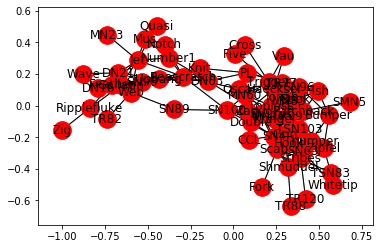

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [4]:
plot_graph(G)
print(list(G.nodes()))

In [5]:
from networkx import to_numpy_matrix
#计算邻接矩阵A-hat矩阵和度矩阵D-hat矩阵
order = sorted(list(G.nodes()))
print(order)
A = to_numpy_matrix(G,nodelist=order)
print("A = \n",A)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
A = 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [6]:
I = np.eye(G.number_of_nodes())
A_hat = A + I

D_hat = np.array(np.sum(A_hat,axis = 0))[0]
print('D_hat = \n',D_hat)
#此时为对角线元素

D_hat = 
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]


In [7]:
 D_hat = np.matrix(np.diag(D_hat))#转换为对角矩阵

In [8]:
#定义权重
W1 = np.random.normal(loc = 0,scale = 1,size = (G.number_of_nodes(),4))
W2 = np.random.normal(loc = 0,size = (W1.shape[1],2))

In [9]:
#定义relu激活函数
def relu(x):
    return(abs(x)+x)/2
#定义GCN层
def gcn_layer(A_hat,D_hat,X,W):
    return relu(D_hat**-1 * A_hat * X * W)

In [25]:
#定义卷积层
H_1 = gcn_layer(A_hat,D_hat,I,W1)
H_2 = gcn_layer(A_hat,D_hat,H_1,W2)
output = H_2
print('output=\n', output)

output=
 [[0.37761986 0.        ]
 [0.22579835 0.        ]
 [0.46633893 0.        ]
 [0.09738464 0.        ]
 [0.13866991 0.        ]
 [0.38826173 0.        ]
 [0.4182092  0.        ]
 [0.08809203 0.        ]
 [0.15836267 0.        ]
 [0.39165542 0.        ]
 [0.48641787 0.        ]
 [0.07347945 0.        ]
 [0.04180334 0.08166843]
 [0.34925105 0.        ]
 [0.16074419 0.        ]
 [0.11912405 0.        ]
 [0.17563202 0.        ]
 [0.47184804 0.        ]
 [0.14467721 0.        ]
 [0.10065763 0.        ]
 [0.19967763 0.        ]
 [0.15612286 0.        ]
 [0.35683826 0.        ]
 [0.0520688  0.        ]
 [0.12492437 0.        ]
 [0.59487456 0.        ]
 [0.57751843 0.        ]
 [0.4669691  0.        ]
 [0.25700543 0.        ]
 [0.3077046  0.        ]
 [0.24124567 0.        ]
 [0.29728845 0.        ]
 [0.11187024 0.18542947]
 [0.48425376 0.02397217]
 [0.11166994 0.        ]
 [0.14780719 0.        ]
 [0.142861   0.        ]
 [0.13437357 0.        ]
 [0.17032668 0.        ]
 [0.21553248 0. 

In [11]:
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

feature_representations=
 {'Beak': array([0.37761986, 0.        ]), 'Beescratch': array([0.22579835, 0.        ]), 'Bumper': array([0.46633893, 0.        ]), 'CCL': array([0.09738464, 0.        ]), 'Cross': array([0.13866991, 0.        ]), 'DN16': array([0.38826173, 0.        ]), 'DN21': array([0.4182092, 0.       ]), 'DN63': array([0.08809203, 0.        ]), 'Double': array([0.15836267, 0.        ]), 'Feather': array([0.39165542, 0.        ]), 'Fish': array([0.48641787, 0.        ]), 'Five': array([0.07347945, 0.        ]), 'Fork': array([0.04180334, 0.08166843]), 'Gallatin': array([0.34925105, 0.        ]), 'Grin': array([0.16074419, 0.        ]), 'Haecksel': array([0.11912405, 0.        ]), 'Hook': array([0.17563202, 0.        ]), 'Jet': array([0.47184804, 0.        ]), 'Jonah': array([0.14467721, 0.        ]), 'Knit': array([0.10065763, 0.        ]), 'Kringel': array([0.19967763, 0.        ]), 'MN105': array([0.15612286, 0.        ]), 'MN23': array([0.35683826, 0.        ]), 'MN60':

In [49]:

# 绘制output，节点GCN embedding可视化
def plot_node(output):
    for i in range(len(nodes)):
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.show()

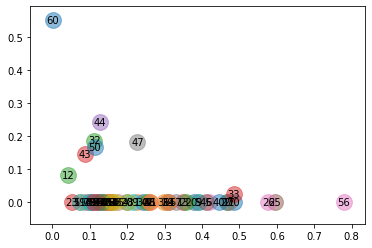

In [50]:
plot_node(output)